In [1]:
# In Depth: Naive Bayes Classification
"""
Классификация по наивному бейзу (Naive Bayes) — 
это метод машинного обучения, используемый для 
классификации данных. Он основан на применении 
теоремы Байеса, которая позволяет вычислять 
вероятности на основе условных вероятностей. 
В наивном бейзе предполагается, что все признаки 
независимы друг от друга, что является упрощением, 
но позволяет значительно ускорить вычисления.

Алгоритм наивного бейза работает следующим образом:

Сначала вычисляется приори вероятность каждого класса в целом.
Затем для каждого признака вычисляется условная 
вероятность его присутствия в каждом классе.
Используя эти вероятности, для каждого класса 
вычисляется вероятность того, что данный объект принадлежит этому классу.
Объект классифицируется в класс с наибольшей вероятностью.

Where to use Naive Bayes
• They are fast for both training and prediction.
• They provide straightforward probabilistic prediction.
• They are often easily interpretable.
• They have few (if any) tunable parameters.

Naive Bayes classifiers tend to perform especially well in the following situations:
• When the naive assumptions actually match the data (very rare in practice)
• For very well-separated categories, when model complexity is less important
• For very high-dimensional data, when model complexity is less important
"""

%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use("seaborn-whitegrid") 


/tmp/ipykernel_549878/2362157239.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


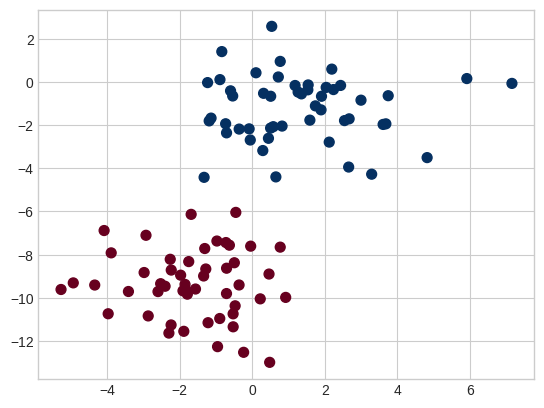

In [2]:
# Gaussian Naive Bayes 
from sklearn.datasets import make_blobs 
X,y = make_blobs(100,2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu")

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [5]:
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14,18] * rng.rand(2000,2)
ynew = model.predict(Xnew)

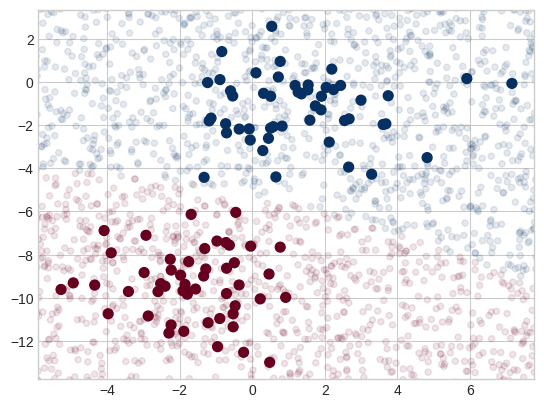

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu")
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap="RdBu", alpha=0.1)
plt.axis(lim);

In [7]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [8]:
# Example: Classifying Text 
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories = ['talk.religion.misc', 'soc.religion.christian',
'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset="train", categories=categories)
test = fetch_20newsgroups(subset="train", categories=categories)

In [10]:
print(train.data[5][48:])

Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [12]:
# помним что прежде чем использовать текст он должен быть векторизован 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [13]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

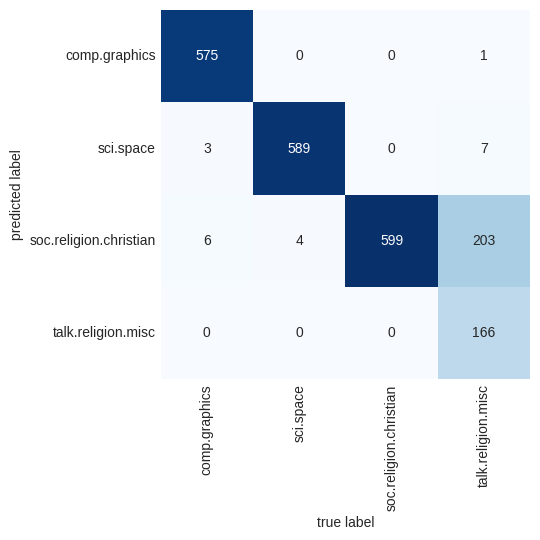

In [15]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names,
cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [17]:
predict_category("sending a payload to the ISS")

'sci.space'

In [18]:
predict_category("discussing the existance of the God")

'soc.religion.christian'

In [19]:
predict_category("determining the screen resolution")

'comp.graphics'